**INTRODUCTION TO PYTHON FOR MACHINE LEARNING, INTERNATIONAL GLOBAL AI BOOTCAMP 2022**

***
**FINAL PROJECT - TEAM WORK**

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

**Project Discribtion**:
In this project, We try to develop an end-to-end data science application using the
dataset given above. The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables.

**GROUP 14**


**TEAM NAME: PYTHON_TEAM_14_Bootcamp_22**


**TEAM MEMBERS:**

1.   FATIMA MUHAMMAD ADAM
2.   




**1. IMPORTING LABRIES**




In [1]:
#importing the required labries for the project
#for data analysis and numeric computation
import pandas as pd                                         
import numpy as np         
# for the vitualazation                                    
import seaborn as sns   
import plotly.express as ex                                    
import matplotlib.pyplot as plt                            
%matplotlib inline
# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler  

#importing the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Model Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

# Model Selection
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split
#importing warnings labries
import warnings
warnings.filterwarnings('ignore')

**2. LOAD FILE**



In [2]:
#reading the dataset from the directory
dataset = pd.read_csv("/content/insurance.csv")

In [3]:
#cheacking how the dataset looks likes
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#let check if there is missing values
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#checking the dataset shape
dataset.shape

(1338, 7)

In [6]:
#checking the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**3. The Exploratory Data Analysis** **(EDA)**

Text(0.5, 1.0, 'The number of smoker ')

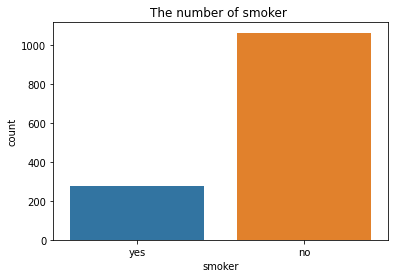

In [8]:
#showing the smoker count
sns.countplot( x = 'smoker', data = dataset)
plt.title("The number of smoker ")

Text(0.5, 1.0, 'The gender distribution')

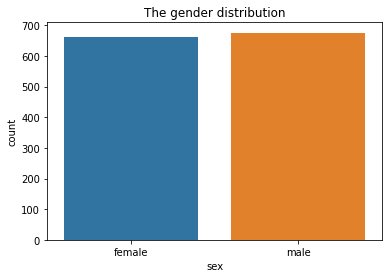

In [9]:
#displaying the gender count
sns.countplot(x = 'sex', data = dataset)
plt.title("The gender distribution")

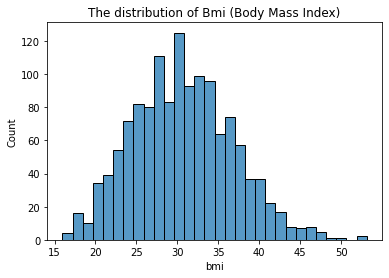

In [10]:
#ploting the histogram chart for the body mass index(bmi)
sns.histplot ( x = dataset [ "bmi"], bins = 30)
plt.title("The distribution of Bmi (Body Mass Index)")
plt.show()

Text(0.5, 1.0, 'The relationship between “smoker” and “charges')

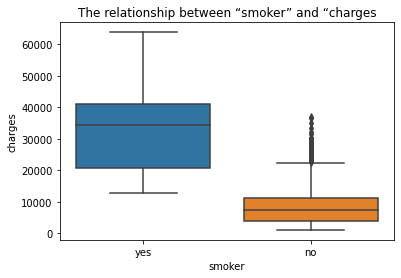

In [11]:
#relationship between smoker and charges 
sns.boxplot(x = 'smoker', y = 'charges', data = dataset)
plt.title("The relationship between “smoker” and “charges")

In [12]:
#Examine the relationship between “smoker” and “region”.
color_discrete_map = {'yes': 'rgb(250,0,0)', 'no': 'rgb(0,250,0)'}
fig = ex.box(data_frame = dataset, x="region", y="charges", color="smoker", title='Spread of Individual Medical Costs based on Region Level and Smoker')
fig.update_traces(quartilemethod="exclusive")
fig.show()

Text(0.5, 1.0, 'The relationship between sex and bmi')

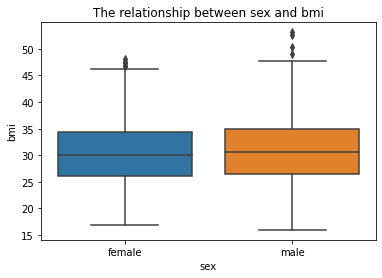

In [13]:
#displaying the relationship between the sex and the bmi
sns.boxplot(x = 'sex', y = 'bmi', data = dataset)
plt.title("The relationship between sex and bmi")

In [14]:
#Bar chart for number of Children
plt.figure(figsize = (15, 10))
ex.bar(data_frame = dataset, x = dataset['children'].unique(), y = dataset['children'].value_counts(),  title='Bar chart for number of Children')


<Figure size 1080x720 with 0 Axes>

In [15]:
#  the "region" with the most "children".
plt.figure(figsize = (20, 10))
color_discrete_map = {'yes': 'rgb(200,0,0)', 'no': 'rgb(0,200,0)'}
fig = ex.box(data_frame = dataset, x="region", y="charges", color="children", title='The region with the most children', color_discrete_map = color_discrete_map)
fig.update_traces(quartilemethod="exclusive")
fig.show()

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Examine the relationship between “bmi” and “sex”.')

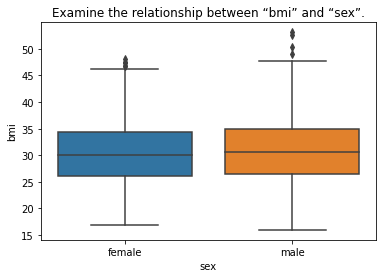

In [16]:
#Examine the relationship between “age” and “bmi

sns.boxplot(x = 'sex', y = 'bmi', data = dataset)
plt.title("Examine the relationship between “bmi” and “sex”.")

Text(0.5, 1.0, 'Examine the relationship between “bmi” and “children”')

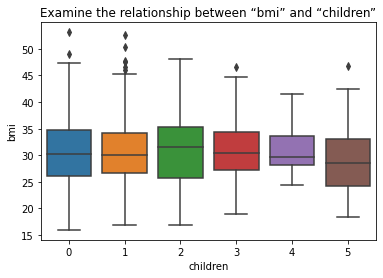

In [17]:
#Examine the relationship between “bmi” and “children”
sns.boxplot(x = 'children', y = 'bmi', data = dataset)
plt.title("Examine the relationship between “bmi” and “children”")

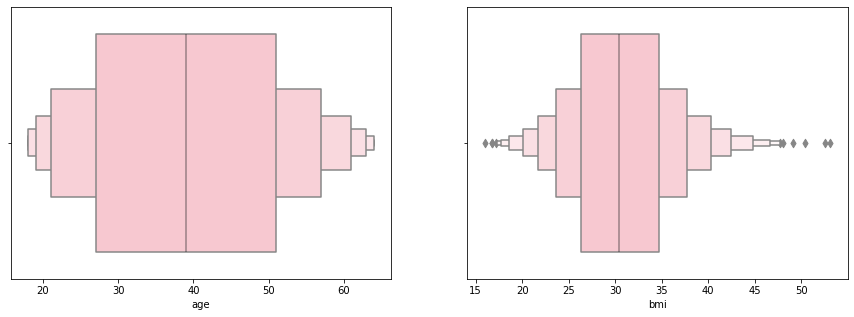

In [18]:
#Checking Outliers In bmi and age
columns = ['age', 'bmi']
q, r = divmod(len(columns), 2)
fig, ax = plt.subplots(q, 2, figsize=(15,5))
for i, col in enumerate(columns):
    q, r = divmod(i, 2)
    warnings.filterwarnings(action='ignore')
    sns.boxenplot(dataset[col], ax=ax[r], color='pink')

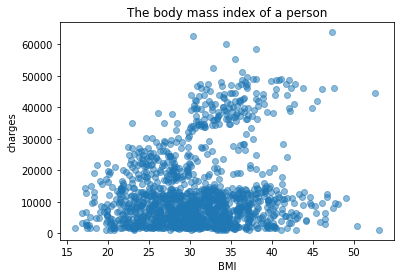

In [19]:
#examining the relationship between the "bmi" and charges
plt.scatter( x = dataset["bmi"], y = dataset[ "charges"],  alpha = 0.5)
plt.title("The body mass index of a person")
plt.xlabel("BMI")
plt.ylabel("charges")
plt.show()

Checking skewness
age  :  0.05567251565299186
bmi  :  0.2840471105987448
charges  :  1.5158796580240388


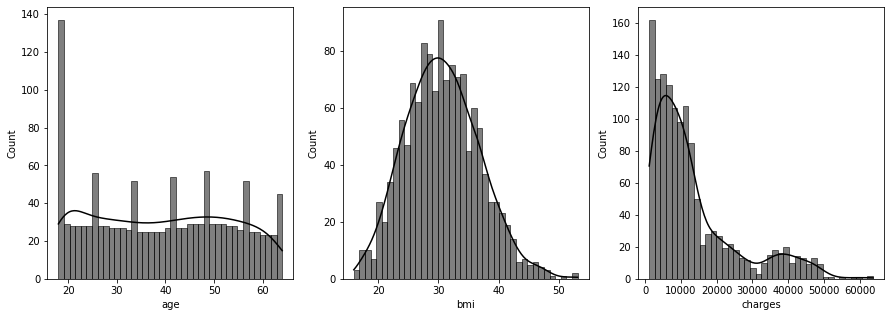

In [20]:
columns = ['age', 'bmi', 'charges']
q, r = divmod(len(columns), 3)
fig, ax = plt.subplots(q, 3, figsize=(15,5))
print("Checking skewness")
for i, col in enumerate(columns):
    print(col, ' : ', dataset[col].skew())
    q, r = divmod(i, 3)
    sns.histplot(dataset[col], kde=True, ax=ax[r], bins = 40, color='black')

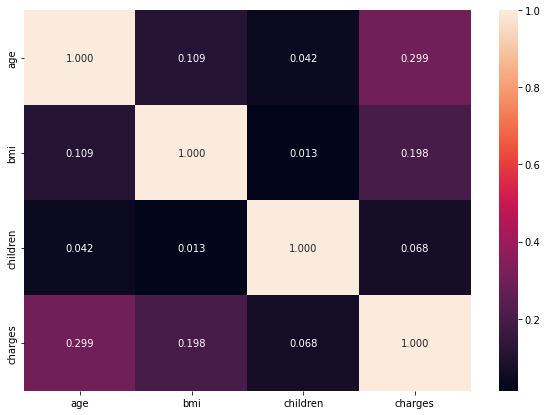

In [21]:
#correlation analysis
plt.figure(figsize = (10, 7))
list1=["age","bmi","children","charges","smoker","sex","region"]
sns.heatmap(dataset[list1].corr(),annot=True,fmt=".3f")
plt.show()

**Counting the values in each of the columns we have** 

In [22]:
#counting the values of region colums
region = dataset[ "region"].value_counts()
print(region)


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [23]:
#counting the values of the smoker coloum
smoker = dataset["smoker"].value_counts()
print(smoker)

no     1064
yes     274
Name: smoker, dtype: int64


In [24]:
#counting how many people has 0,1,2,3,4,5 children  from the children coloums
children = dataset["children"].value_counts()
print(children)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [25]:
#counting the number of people from thier gender
sex = dataset ['sex'].value_counts()
print(sex)

male      676
female    662
Name: sex, dtype: int64


**4. DATA PREPROCESSING**

In [26]:
dataset.head() #displaying the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
#dropping the duplicates from the dataset
dataset.drop_duplicates(inplace = True)
dataset.shape

(1337, 7)

In [28]:
#let analysis of the terget columns,  Print statistical values of column 'charges'
round(dataset['charges'].describe(), 3 )

count     1337.000
mean     13279.121
std      12110.360
min       1121.874
25%       4746.344
50%       9386.161
75%      16657.717
max      63770.428
Name: charges, dtype: float64

In [29]:
# One Hot Encoder
dataset = pd.get_dummies(dataset, columns = ['sex', 'smoker', 'region'], drop_first =True)


In [30]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [31]:
x = dataset.drop(columns=['charges'], axis = 1)
y = dataset['charges']

In [32]:
print(x)

      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [33]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [52]:
#split the data into train  and test set with ratio 70:30
x_train,x_test, y_train, y_test = train_test_split( x,y, test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((935, 8), (402, 8), (935,), (402,))

In [53]:
#Feature Scaling and Feature Transformation
standard_scaler = StandardScaler().fit(x_train)
x_train_trans = standard_scaler.transform(x_train)
x_test_trans = standard_scaler.transform(x_test)
y_train_trans = np.log(y_train)
y_test_trans = np.log(y_test)

**5. Model Selection**

In [54]:
# the linear regression model 
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
y_pred_linear_reg_model = linear_reg_model.predict(x_test)

In [55]:
pd.DataFrame(zip(x.columns,linear_reg_model.coef_))

,0,1
0,age,257.259616
1,bmi,367.858206
2,children,448.205463
3,sex_male,-366.696560
4,smoker_yes,23781.720391
5,region_northwest,341.922142
6,region_southeast,-954.587071
7,region_southwest,-399.624468


In [56]:
#importing support vector machine model
kf = KFold(shuffle=True,n_splits=3,random_state=42)
estimator_svr = Pipeline([("pf",PolynomialFeatures()),
                          ("scaler",StandardScaler()),
                          ("svr",SVR())])
params_svr = {'svr__kernel':['rbf','linear','sigmoid'],
              'pf__degree':[x for x in range(1,6)]}
grid_svr = GridSearchCV(estimator_svr,params_svr,cv=kf)
grid_svr.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pf', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'pf__degree': [1, 2, 3, 4, 5],
                         'svr__kernel': ['rbf', 'linear', 'sigmoid']})

In [57]:
grid_svr.best_params_

{'pf__degree': 5, 'svr__kernel': 'linear'}

In [58]:
y_pred_svr = grid_svr.predict(x_test)

In [59]:
#decision tree model
treeRegressionModel = DecisionTreeRegressor(random_state=42)
treeRegressionModel.fit(x_train, y_train)
treeRegressionModel.score(x_test,y_test)

0.6661480116919761

In [60]:
# check after taking the depth of  tree with  1- 16 whcih depth has the higer score 
scores = {}
for depth in range(1, 16):
  treeRegressionModel = DecisionTreeRegressor(random_state=42, max_depth=depth)
  treeRegressionModel.fit(x_train, y_train)
  treeRegressionModel.score(x_test, y_test)
  scores[depth] = treeRegressionModel.score(x_test, y_test)

print(scores)

{1: 0.6105943923313287, 2: 0.8197837400961295, 3: 0.84163593766444, 4: 0.8487133569943252, 5: 0.8408937041983933, 6: 0.8089388772586577, 7: 0.7958158662318108, 8: 0.7506472799397153, 9: 0.7529470604555015, 10: 0.7172520724256054, 11: 0.6841954537466295, 12: 0.6833475224113165, 13: 0.6906375207241392, 14: 0.6737941757066082, 15: 0.6721928083610076}


**depth 4 has the hight score**

In [61]:
#displying the model with higher score
treeRegressionModel = DecisionTreeRegressor(random_state=42, max_depth=4)
treeRegressionModel.fit(x_train, y_train)
y_pred_dt = treeRegressionModel.predict(x_test)
treeRegressionModel.score(x_test, y_test)

0.8487133569943252

In [62]:
#random forest model
kf = KFold(shuffle=True,random_state=42,n_splits=3)
RFregressor = RandomForestRegressor(n_estimators=200,random_state=0)
params_RF = {'n_estimators':[10,100,200,300,1000],
              'random_state':[0]}
grid_RF = GridSearchCV(RFregressor,params_RF,cv=kf)
grid_RF.fit(x_train,y_train);
y_pred_RF = grid_RF.predict(x_test)

In [63]:
grid_RF.best_params_

{'n_estimators': 300, 'random_state': 0}

In [64]:
grid_RF.score(x_test,y_test)

0.8357609022630926

In [65]:
#XGBRegressor model

kf = KFold(shuffle=True,random_state=42,n_splits=3)
estimator_xgb = Pipeline([("polynomial_features",PolynomialFeatures()),
                          ("scaler",StandardScaler()),
                          ("xgb_regression",XGBRegressor(verbosity=0))])
params_xgb = {'polynomial_features__degree':[1,2,3],
              'xgb_regression__n_estimators':[100,200,300,400,500],
              'xgb_regression__max_depth':[3,4,5,6]}
grid_xgb = GridSearchCV(estimator_xgb,params_xgb,cv=kf)
grid_xgb.fit(x_train,y_train);
y_pred_xgb = grid_xgb.predict(x_test)


In [66]:
grid_xgb.best_params_

{'polynomial_features__degree': 1,
 'xgb_regression__max_depth': 3,
 'xgb_regression__n_estimators': 100}

In [67]:
#ridge regression model
clf = Ridge(alpha=1.0)
clf.fit(x_train , y_train)
clf.score(x_test,y_test)

0.72147727593674

In [68]:
y_pred_ridge = clf.predict(x_test)


**summary of the models**

From the above models, trained random forest models have the highest performance, with 83%. But if a decision tree is taken and we go further into its depths, a performance higher than the random forest model can be achieved, as seen how we achieved 84% after going further inside the depths, which is depth 4.

**6. MODEL EVALUATION**

In [69]:
#definig the model evaluation function
def rmse(y_pred,y_test):
  return np.sqrt(mean_squared_error(y_pred,y_test))

#printing the linear regression mean_squared_error
print('***Simple Linear Regression***')
print('R2 score: ',r2_score(y_pred_linear_reg_model,y_test))
print('RMSE: ',rmse(y_pred_linear_reg_model,y_test))


#printing the support vector machine mean_squared_error
print('***SVR Regression***')
print('R2 score: ',r2_score(y_pred_svr,y_test))
print('RMSE: ',rmse(y_pred_svr,y_test))



# printing the Ridge regression model mean_squared_error
print('***Ridge Regression***')
print('R2 score: ',r2_score(y_pred_ridge,y_test))
print('RMSE: ',rmse(y_pred_ridge,y_test))


#printing the decision tree regrestion model mean_squared_error
print('***Decision Tree Regression***')
print('R2 score: ',r2_score(y_pred_dt,y_test))
print('RMSE: ',rmse(y_pred_dt,y_test))



#printing Random forest model  mean_squared_error
print('***Random Forest Regression***')
print('R2 score: ',r2_score(y_pred_RF,y_test))
print('RMSE: ',rmse(y_pred_RF,y_test))



#printing the XGB model mean_squared_error
print('***XGB Regression***')
print('R2 score: ',r2_score(y_pred_xgb,y_test))
print('RMSE: ',rmse(y_pred_xgb,y_test))

***Simple Linear Regression***
R2 score:  0.6134383040520817
RMSE:  6316.058668045009
***SVR Regression***
R2 score:  0.5681388347167688
RMSE:  6191.771936460576
***Ridge Regression***
R2 score:  0.6089705642316743
RMSE:  6317.162014196421
***Decision Tree Regression***
R2 score:  0.8225899609438687
RMSE:  4655.775078345553
***Random Forest Regression***
R2 score:  0.8105230841706064
RMSE:  4850.985466239506
***XGB Regression***
R2 score:  0.8245613234987699
RMSE:  4555.902783027781


**from the above model evaluation we conclude that XGB regression has the higher R2 score**